The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Model and Tokenizer loaded successfully!

--- Generating Personalized Content ---

- Generating for: Tech Enthusiast -
user
You are an expert content creator. Your task is to write a short blog post introduction about the topic: "The Impact of Large Language Models on Business". Tailor your writing style, tone, and vocabulary for the following audience: someone who is deeply interested in the technical details and implementation of artificial intelligence, including coding and algorithms..
assistant
##  Beyond the Hype: Unlocking the Technical Potential of LLMs for Your Business

We've all seen the headlines: "Revolutionize your business with AI!" But the real power of Large Language Models (LLMs) lies not in their marketing blurbs, but in a deep understanding of their technical architecture. 

For the technically inclined developer and architect, the true value of LLMs isn't just their impressive prompting capabilities. It's the intricate interplay of Transformer networks, attention m

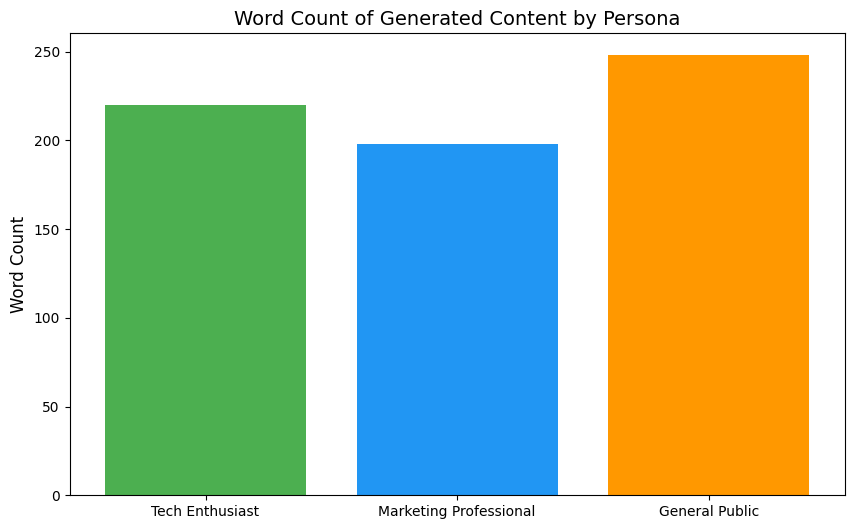

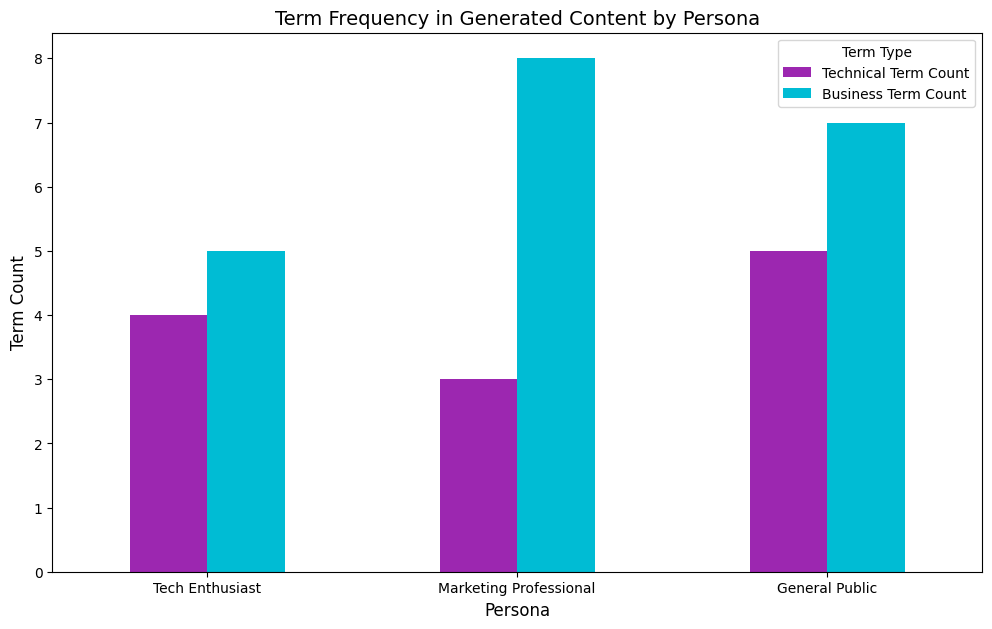


Analysis and visualizations are complete.


In [13]:
# ======================================================================
# 1. Setup and Model Loading
# This cell installs libraries and loads the LLM onto the GPU.
# This will take a significant amount of time to download the model for the first time.
# ======================================================================

# Install the necessary libraries for model loading and data handling.
!pip install -q transformers bitsandbytes accelerate

# Import the required classes from the transformers library.
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Use the specific model ID for LFM2-2.6B.
model_id = "LiquidAI/LFM2-2.6B"

# Load the tokenizer and model.
# Note: LFM2-2.6B is a new model, so you may need a very recent version of transformers.
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype=torch.bfloat16,  # Use bfloat16 for better performance on newer GPUs
    load_in_4bit=True
)

# Set the model to evaluation mode.
model.eval()

print("Model and Tokenizer loaded successfully!")

# ======================================================================
# 2. Personalized Content Generation
# This section defines the personas, creates a prompt template,
# and generates the personalized content.
# ======================================================================

def generate_personalized_content(persona, topic):
    """
    Generates a personalized blog post introduction based on a user persona.
    This function uses the correct ChatML-like template for the LFM2-2.6B model.
    """
    # The prompt is structured in a specific chat format for the LFM2 model.
    # The 'user' role is used to provide the instruction.
    messages = [
        {"role": "user", "content": f"""You are an expert content creator. Your task is to write a short blog post introduction about the topic: "{topic}". Tailor your writing style, tone, and vocabulary for the following audience: {persona}."""},
    ]

    # The tokenizer's apply_chat_template method formats the messages correctly.
    input_ids = tokenizer.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,
        return_tensors="pt"
    ).to(model.device)

    # Generate the response.
    outputs = model.generate(
        input_ids,
        max_new_tokens=250,
        do_sample=True,
        temperature=0.7
    )

    # Decode the generated tokens back to text and clean the output.
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    # The model's response is often a continuation of the last turn.
    # We need to extract the assistant's part.
    response = generated_text.split("<|assistant|>")[-1].strip()

    return response

# Define your personas and a topic.
personas = {
    "Tech Enthusiast": "someone who is deeply interested in the technical details and implementation of artificial intelligence, including coding and algorithms.",
    "Marketing Professional": "a professional who cares about business applications of technology, return on investment, and attracting customers.",
    "General Public": "a regular person with little to no technical knowledge, looking for simple, easy-to-understand explanations and real-world examples."
}

topic = "The Impact of Large Language Models on Business"

# Store the generated content for later analysis.
generated_content_data = {}

print("\n--- Generating Personalized Content ---")
for persona_name, persona_description in personas.items():
    print(f"\n- Generating for: {persona_name} -")
    content = generate_personalized_content(persona_description, topic)
    generated_content_data[persona_name] = content
    print(content)
    print("---") # Separator for readability

# ======================================================================
# 3. Analysis and Visualization
# This section analyzes the generated text and creates plots.
# ======================================================================

# Import pandas for data handling and matplotlib for plotting.
import pandas as pd
import matplotlib.pyplot as plt

print("\n--- Performing Analysis and Creating Visualizations ---")

# Create a list to hold the analysis results.
analysis_results = []
for persona, content in generated_content_data.items():
    # Calculate key metrics.
    word_count = len(content.split())
    tech_term_count = content.lower().count("algorithm") + content.lower().count("finetuning") + content.lower().count("model")
    biz_term_count = content.lower().count("business") + content.lower().count("revenue") + content.lower().count("marketing")

    analysis_results.append({
        "Persona": persona,
        "Word Count": word_count,
        "Technical Term Count": tech_term_count,
        "Business Term Count": biz_term_count
    })

# Convert the results into a DataFrame for easier plotting.
df = pd.DataFrame(analysis_results)

# Create a bar chart for word count.
plt.figure(figsize=(10, 6))
plt.bar(df["Persona"], df["Word Count"], color=['#4CAF50', '#2196F3', '#FF9800'])
plt.title("Word Count of Generated Content by Persona", fontsize=14)
plt.ylabel("Word Count", fontsize=12)
plt.show()

# Create a bar chart for term counts.
df_terms = df.set_index("Persona")[["Technical Term Count", "Business Term Count"]]
df_terms.plot(kind='bar', figsize=(12, 7), rot=0, color=['#9C27B0', '#00BCD4'])
plt.title("Term Frequency in Generated Content by Persona", fontsize=14)
plt.ylabel("Term Count", fontsize=12)
plt.xlabel("Persona", fontsize=12)
plt.legend(title="Term Type")
plt.show()

print("\nAnalysis and visualizations are complete.")